# Q1 
Generate 1000 samples of an AR(1) process using aa = 0.8 . Plot the theoretical and
estimated PSD for comparison.
(aa) Using standard periodogram (i.e. rectangular window) with window length N=1000,
estimate the PSD. Compare this PSD with the average of two periodograms that you
obtain from N=500 for estimating the PSD twice (one with the first 500 signal samples
and one with the second 500 samples. Please plot these periodograms together with the
true/theoretical one in the same figure.
(bb) Repeat part (a) using the modified periodogram with Hamming window.
(cc) Comment on your results from part (a) and (b) in terms of the estimation accuracy
with respect to different window shape and length.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict
import math
import scipy as sp
import sympy, control
from scipy import signal as sg
import numpy as np
import sys
import os
import seaborn as sb

In [2]:
b=[1,0]
a=[1,-0.8]
(z,p,k) = sg.tf2zpk(b,a)

In [3]:
print(z,p,k)

[0.] [0.8] 1.0


In [4]:
sys = sg.TransferFunction(a,b,dt =0.1)
print(sys)

TransferFunctionDiscrete(
array([ 1. , -0.8]),
array([1., 0.]),
dt: 0.1
)


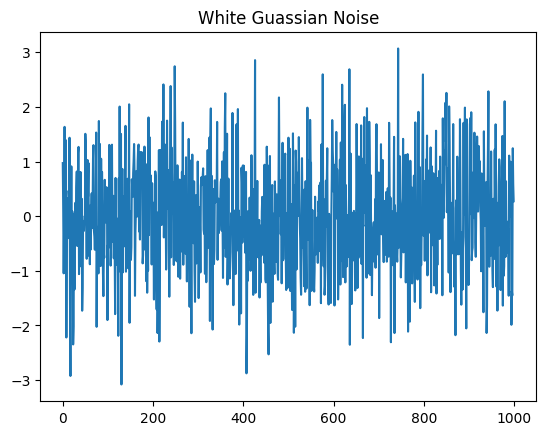

In [157]:
#x(n) = 0.98*x(n-3)+w(n)
#Defining w
import numpy
import matplotlib.pyplot as plt

mean = 0 #0 mean
std = 1  # 1 standard deviation
num_samples = 1000
w = numpy.random.normal(mean, std, size=num_samples)
plt.title('White Guassian Noise')

plt.plot(w)

plt.show()

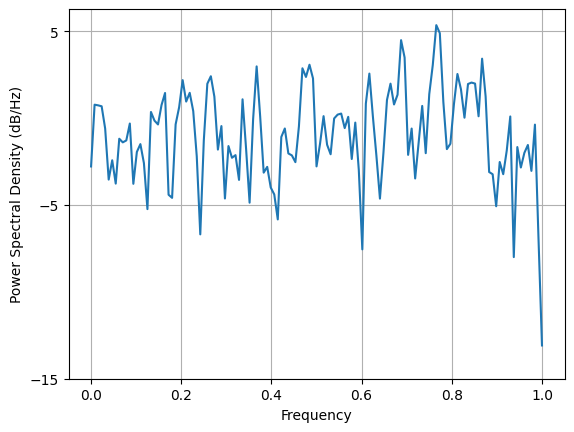

In [158]:
plt.psd(w)
plt.show()

### Signal generation

In [7]:
#x(n) = ax(n-1)+w(n) #AP 1 system
a=0.8
sample =1000
l=1
x=[0]*sample
for i in range(sample):
    if (i-l)<0:
        x[i]=0
    else:
        x[i] = a*x[i-l] + w[i]
        

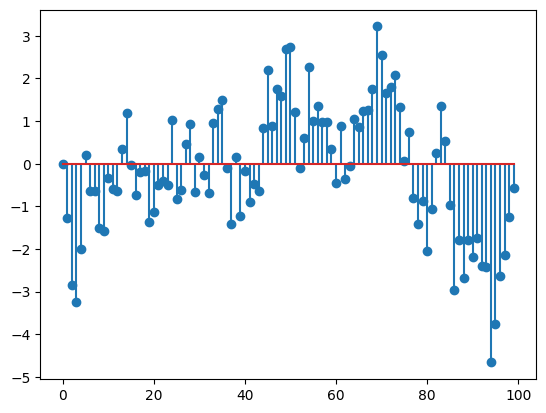

In [8]:
x1 = np.array(x[:100])
plt.stem(x1)
plt.show()

## Theoretical PSD

In [9]:
# Theoretical PSD can be calculated using FFT

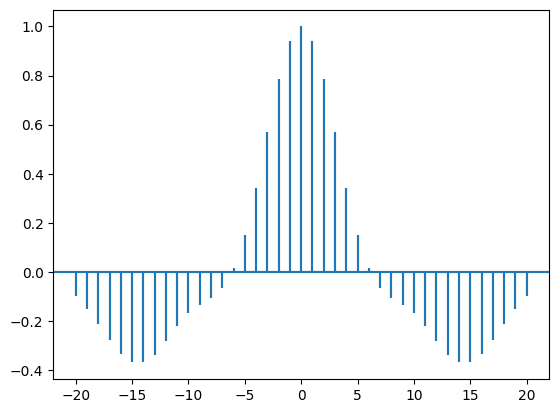

In [152]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
l = 20 #lag
[lags,cx,l1,l2]=plt.acorr(x,maxlags=20)
plt.acorr(x,maxlags=20)
plt.show()



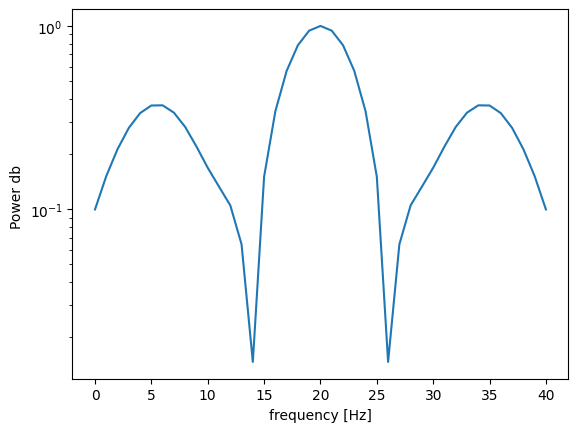

In [153]:
from numpy.fft import fft, fftfreq, rfft
res1 = fft(cx)
freq = fftfreq(len(cx))

import matplotlib.pyplot as plt

# plt.plot(res1*(-1))
fs = 1
# t = np.arange(0, 10, 1/fs)
# trange = np.linspace(0, fs, len(t))
# plt.plot(trange, np.abs(res1))
# plt.plot((freq),10*np.log10((abs(res1))))
plt.semilogy(abs(cx))
plt.xlabel('frequency [Hz]')
plt.ylabel('Power db ')
plt.show()

In [12]:
# Estimated PSD can be calculated using Peridogram

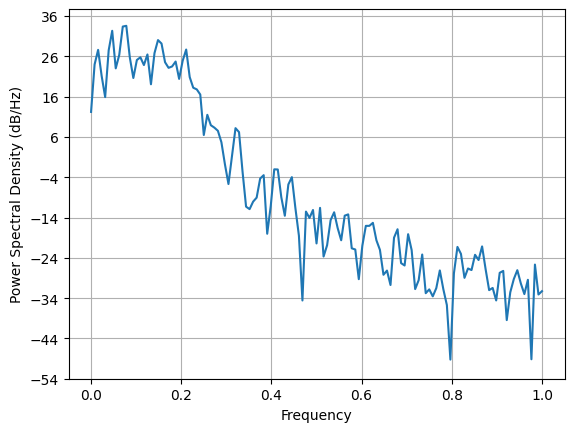

In [155]:
plt.psd(x)
plt.show()

### Rectangular Window, N=1000

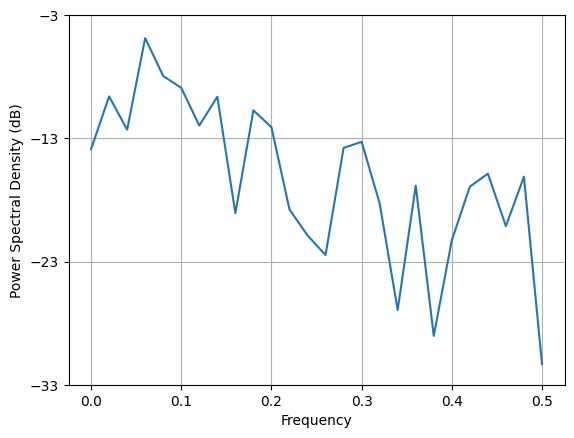

In [13]:
win = sg.windows.boxcar(50, sym=True)

plt.psd(x[:50],window=win,Fs=1,NFFT=50,scale_by_freq=False)
plt.show()

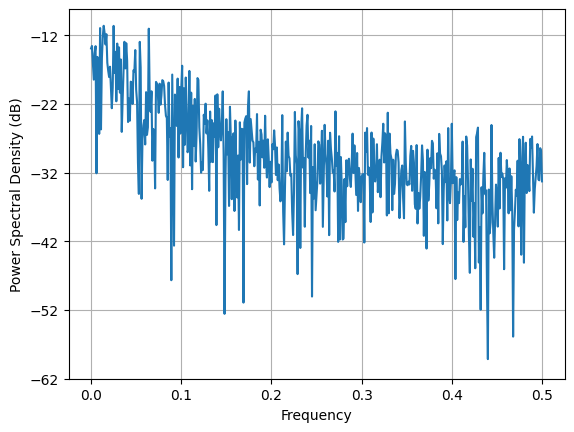

In [14]:
win1 = sg.windows.boxcar(1000, sym=True)

plt.psd(x,window=win1,Fs=1,NFFT=1000,scale_by_freq=False)
plt.show()

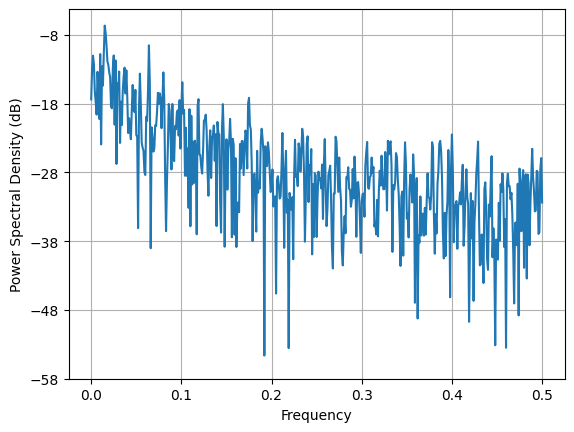

In [15]:
win2 = sg.windows.hamming(1000, sym=True)

plt.psd(x,window=win2,Fs=1,NFFT=1000,scale_by_freq=False)
plt.show()

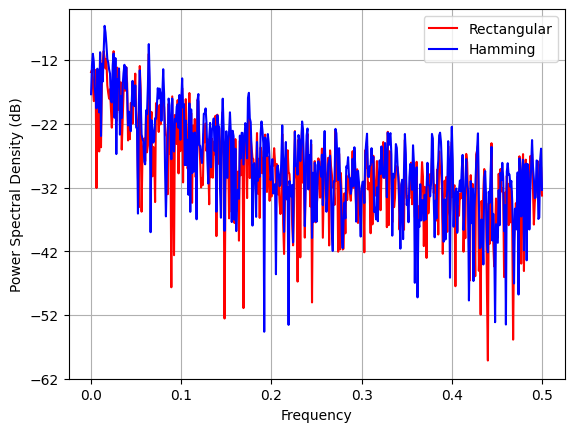

In [16]:
plt.psd(x,window=win1,Fs=1,NFFT=1000,scale_by_freq=False,color='r', label='Rectangular')
plt.psd(x,window=win2,Fs=1,NFFT=1000,scale_by_freq=False,color='b', label='Hamming')
plt.legend()
plt.show()

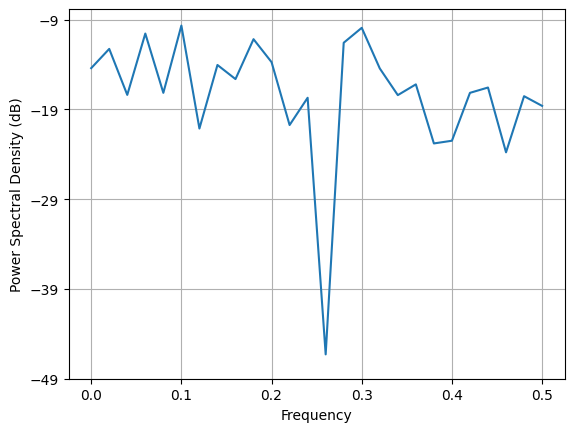

In [17]:
win = sg.windows.hamming(50, sym=True)

plt.psd(x[:50],window=win,Fs=1,NFFT=50,scale_by_freq=False)
plt.show()

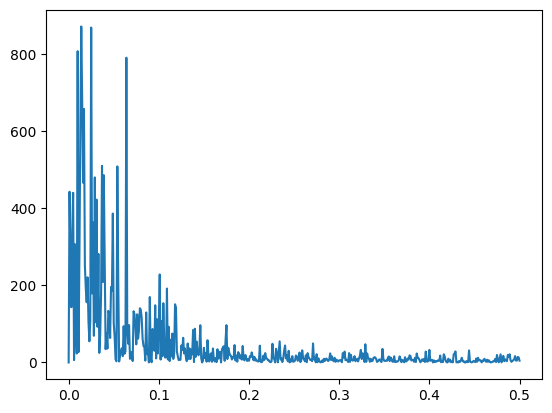

In [18]:
from math import log
f, Pxx_den = sg.periodogram(x, fs=1)
for ix in Pxx_den:
    ix = log(ix)
plt.plot(f, abs(10*Pxx_den))
plt.show()

### Hamming Window, N=1000

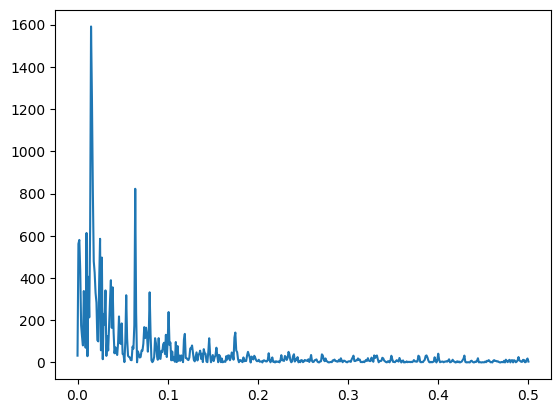

In [19]:
from math import log
win = sg.windows.hamming(1000)
f, Pxx_den = sg.periodogram(x, fs=1, window=win)
for ix in Pxx_den:
    ix = log(ix)
plt.plot(f, abs(10*Pxx_den))
plt.show()

## Average PSD for 500 Samples

### 500 Samples Avg, Rectangular

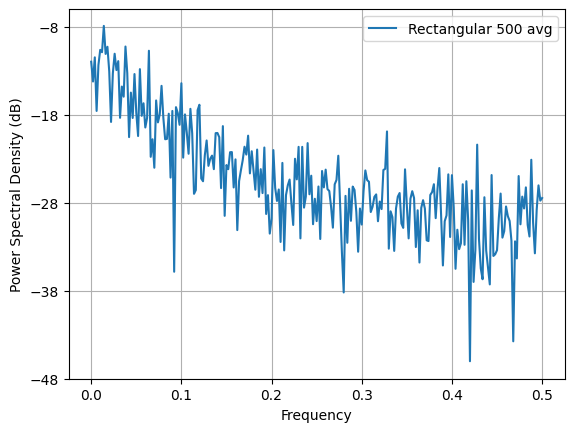

In [20]:
win3 = sg.windows.boxcar(500, sym=True)
# f1, Pxx_den1 = sg.periodogram(x[:500], fs=1,window=win)   
# f2, Pxx_den2 = sg.periodogram(x[500:], fs=1,window=win)
# Pxx_den=[]
# for i in range(len(Pxx_den1)):
#     Pxx_den.append(log(Pxx_den2[i])+log(Pxx_den1[i])/2)
 
# plt.plot(f2, Pxx_den)
# plt.show()
x1 = x[:500]
x2 = x[500:]
x3 = x1+x2
for i in x3:
    i = i/2
# print(x)

plt.psd(x3,window=win3,Fs=1,NFFT=500,scale_by_freq=False, label='Rectangular 500 avg')
plt.legend()
plt.show()


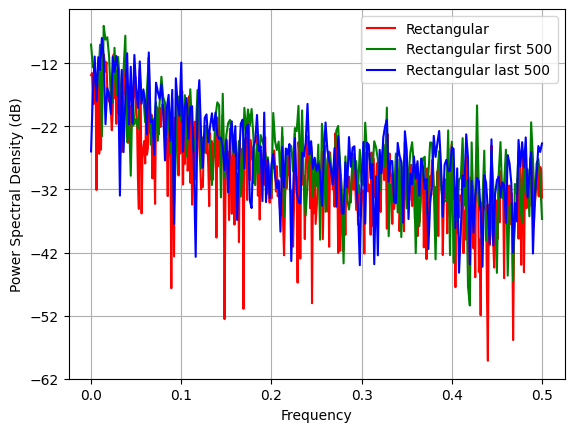

In [21]:
plt.psd(x,window=win1,Fs=1,NFFT=1000,scale_by_freq=False,color='r', label='Rectangular')
plt.psd(x[:500],window=win3,Fs=1,NFFT=500,scale_by_freq=False,color='g', label='Rectangular first 500')
plt.psd(x[500:],window=win3,Fs=1,NFFT=500,scale_by_freq=False,color='b', label='Rectangular last 500')
plt.legend()
plt.show()

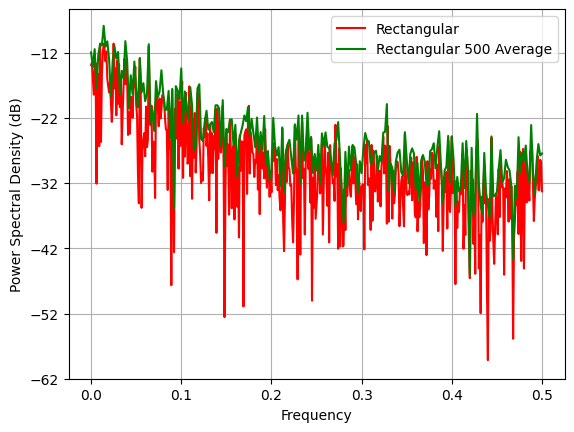

In [27]:
plt.psd(x,window=win1,Fs=1,NFFT=1000,scale_by_freq=False,color='r', label='Rectangular')
plt.psd(x3,window=win3,Fs=1,NFFT=500,scale_by_freq=False,color='g', label='Rectangular 500 Average')
plt.legend()
plt.show()

### 500 sample Hamming

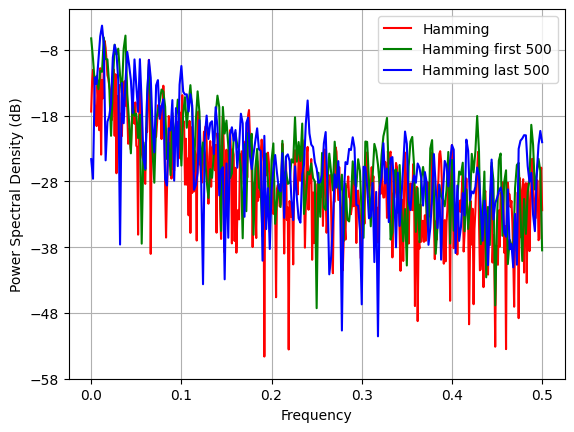

In [29]:
win4 = sg.windows.hamming(1000, sym=True)
win5 = sg.windows.hamming(500, sym=True)

plt.psd(x,window=win4,Fs=1,NFFT=1000,scale_by_freq=False,color='r', label='Hamming')
plt.psd(x[:500],window=win5,Fs=1,NFFT=500,scale_by_freq=False,color='g', label='Hamming first 500')
plt.psd(x[500:],window=win5,Fs=1,NFFT=500,scale_by_freq=False,color='b', label='Hamming last 500')
plt.legend()
plt.show()

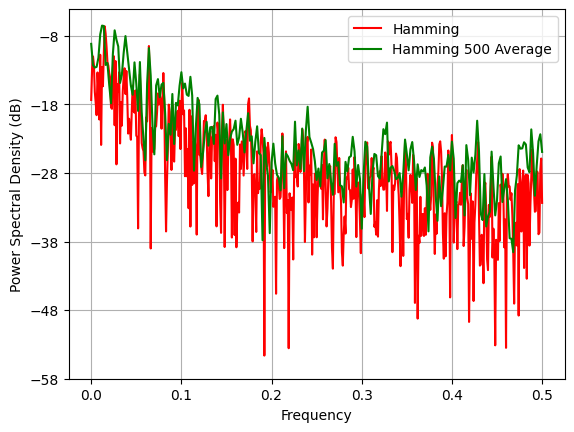

In [30]:

plt.psd(x,window=win4,Fs=1,NFFT=1000,scale_by_freq=False,color='r', label='Hamming')
plt.psd(x3,window=win5,Fs=1,NFFT=500,scale_by_freq=False,color='g', label='Hamming 500 Average')
plt.legend()
plt.show()


#### CONCLUSION

In [159]:
a=0.8
sample =1000
l=1
x=[0]*sample
for i in range(sample):
    if (i-l)<0:
        x[i]=0
    else:
        x[i] = a*x[i-l] + w[i]

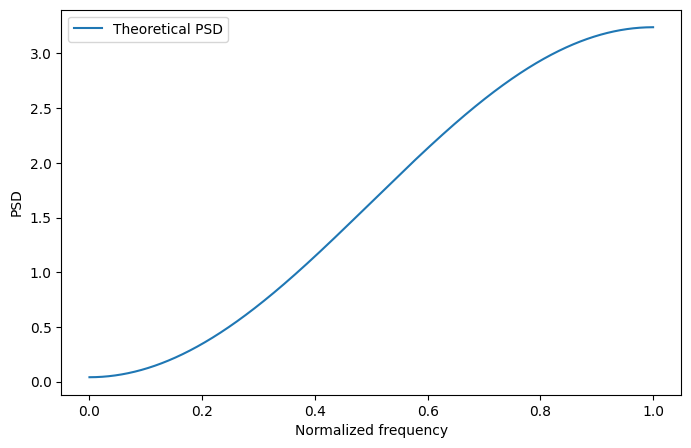

In [161]:
import matplotlib.pyplot as plt
from scipy.signal import freqz
aa = 0.8
sigma = 1
w, h = freqz([1], [1, -0.8], worN=2**12)
psd_theoretical = sigma**2 / np.abs(h)**2

plt.figure(figsize=(8, 5))
plt.plot(w / np.pi, psd_theoretical, label='Theoretical PSD')
plt.xlabel('Normalized frequency')
plt.ylabel('PSD')
plt.legend()
plt.show()

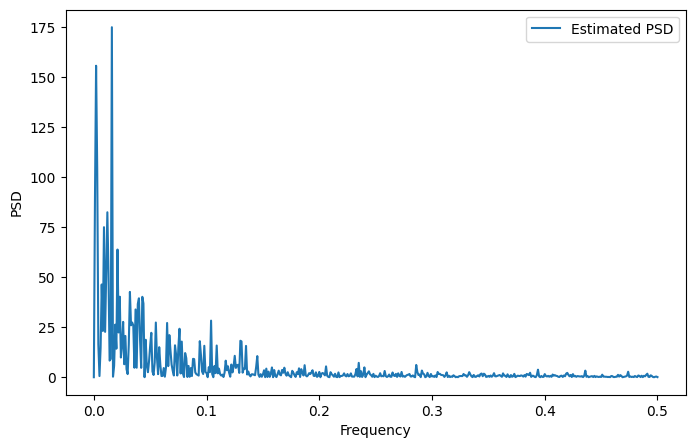

In [164]:

from scipy.signal import periodogram

f, psd_estimated = periodogram(x, window='boxcar', nfft=1000, return_onesided=True)

plt.figure(figsize=(8, 5))
plt.plot(f, psd_theoretical, label='Theoretical PSD')
plt.plot(f, psd_estimated, label='Estimated PSD')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.legend()
plt.show()







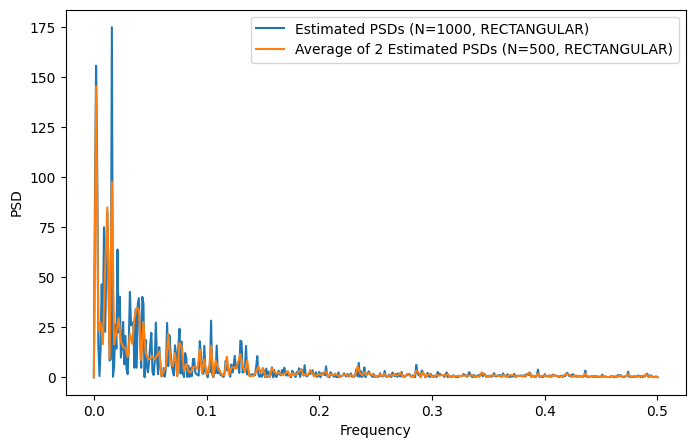

In [168]:
f0, psd_estimated_0 = periodogram(x, window='boxcar', nfft=1000, return_onesided=True)
f1, psd_estimated_1 = periodogram(x[:500], window='boxcar', nfft=500, return_onesided=True)
f2, psd_estimated_2 = periodogram(x[500:], window='boxcar', nfft=500, return_onesided=True)

psd_estimated_average = (psd_estimated_1 + psd_estimated_2) / 2

plt.figure(figsize=(8, 5))
plt.plot(f0, psd_estimated_0, label='Estimated PSDs (N=1000, RECTANGULAR)')
plt.plot(f1, psd_estimated_average, label='Average of 2 Estimated PSDs (N=500, RECTANGULAR)')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.legend()
plt.show()

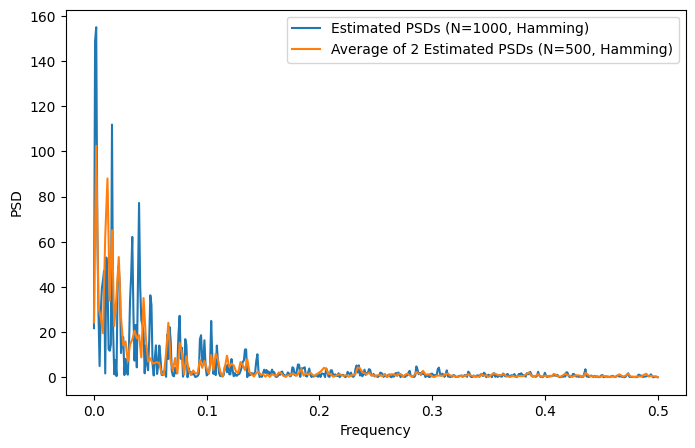

In [170]:
f3, psd_estimated_3 = periodogram(x, window='hamming', nfft=1000, return_onesided=True)
f4, psd_estimated_4 = periodogram(x[:500], window='hamming', nfft=500, return_onesided=True)
f5, psd_estimated_5 = periodogram(x[500:], window='hamming', nfft=500, return_onesided=True)

psd_estimated_average1 = (psd_estimated_4 + psd_estimated_5) / 2

plt.figure(figsize=(8, 5))
plt.plot(f3, psd_estimated_3, label='Estimated PSDs (N=1000, Hamming)')
plt.plot(f4, psd_estimated_average1, label='Average of 2 Estimated PSDs (N=500, Hamming)')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.legend()
plt.show()

# Q2

This problem is to perform the forward linear prediction of a signal x(n) that is
generated by applying a zero-mean Gaussian white noise with unit variance to the input
of a linear filter as described by

HH(zz) = 0.5
(1 − 1.512zz−1 + 0.827zz−2)(1 − 1.8zz−1 + 0.87zz−2)

Please calculate the FPEF (forward prediction error filter) coefficients and the prediction
error power, and then simulate the predicted signal and the prediction error signal for
two predictors of order M=5 and M=8, respectively. You can assume a certain length of
the signal like L=200 to display your simulation results. Please employ the following two
methods for this task.
(a) Use the given system function to establish a difference equation for the
autocorrelation sequence of x(n) and then solve for the rrxx(ll) for certain number of
lags that are sufficient to determine the linear predictor and the prediction error filter.
(b) Use the given system function to generate the signal x(n), based on which you
estimate the autocorrelation sequence by using the ergodic property. Then use this
autocorrelation sequence to determine the linear predictor and the prediction error
filter.
Please plot the predicted signals together with the true signals generated as well as the
prediction error under (a) and (b), respectively. Please plot separately for the cases of
M=5 and M=8.

In [23]:
# X(z) = H(z) x W(z)
# Since W(z) = (Std)^2 =1, X(z) = H(z)

In [24]:
import lcapy as lc
from lcapy.discretetime import z

H = 0.5*(z**4)/((z**4)-3.312*(z**3)+4.417*(z**2)-2.809*(z)+0.72)


In [25]:
b = 0.5
a = [1,-3.312,4.417,-2.809,0.72]

H1 = sg.residuez(b,a)
print(H1)

(array([-1.28296266+0.49887212j, -1.28296266-0.49887212j,
        1.53296266-3.45317334j,  1.53296266+3.45317334j]), array([0.75313881+0.52608103j, 0.75313881-0.52608103j,
       0.90286119+0.19479j   , 0.90286119-0.19479j   ]), array([], dtype=float64))


### Part a
LCCDE 

On simplification
W(Z) = 1/2(X(z))(1-3.312z^(-1)+4.419z^(-2)-2.804z^(-3)+0.72z^(-4))

On Z Inverse transform - LCCDE
w(n) = 0.5(x(n)) -1.66(x(n-1)) +2.201(x(n-2)) -1.40(x(n-3)) +0.36(x(n-4))

x(n) = 3.312x(n-1) -4.419x(n-2) +2.8x(n-3) -0.72x(n-4) +2w(n)
r(l) = E{x(n)x(n-l)}

37.85r(l) = 29.02r(l)-12.45r(l+2)+2.38r(l+3)+28.97r(l-1)+12.45r(l-2)-2.38r(l-3)+2p(l)

Ref - https://www.mathworks.com/help/signal/ref/rlevinson.html

In [50]:
# Signal Generation from Diffrence Equation
# x(n) = 3.312x(n-1) -4.419x(n-2) +2.8x(n-3) -0.72x(n-4) +2w(n)


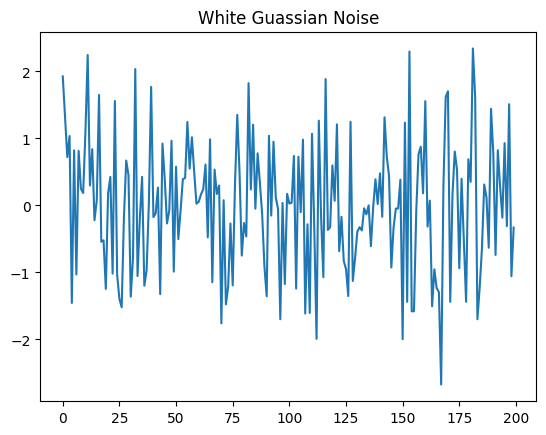

In [173]:
import numpy
import matplotlib.pyplot as plt

mean = 0
std = 1 
num_samples = 200
w = numpy.random.normal(mean, std, size=num_samples)
plt.title('White Guassian Noise')

plt.plot(w)

plt.show()


In [224]:
a=[2,3.312,-4.419,2.8,-0.72]
sample =200
x=[0]*sample
for i in range(sample):
    if (i-4)<0:
        x[i]=0
    else:
        x[i] = a[1]*x[i-1] + a[2]*x[i-2] +a[3]*x[i-3] +a[4]*x[i-4] +a[0]*w[i]

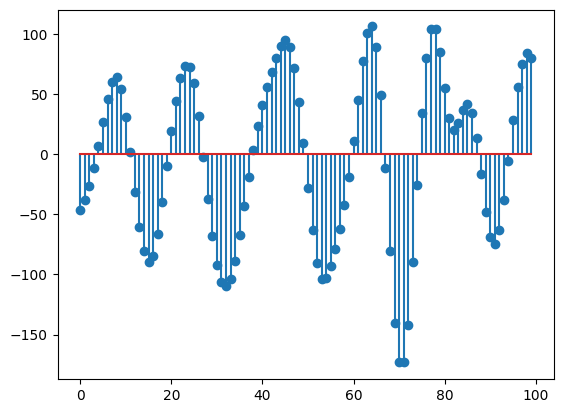

In [226]:

plt.stem(x[100:])
plt.show()

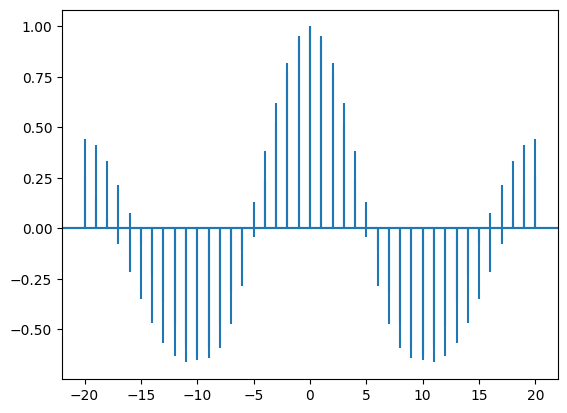

In [227]:
[lag,cx1,l1,l2] = plt.acorr(x,maxlags=20)
plt.acorr(x1,maxlags=20)
plt.show()

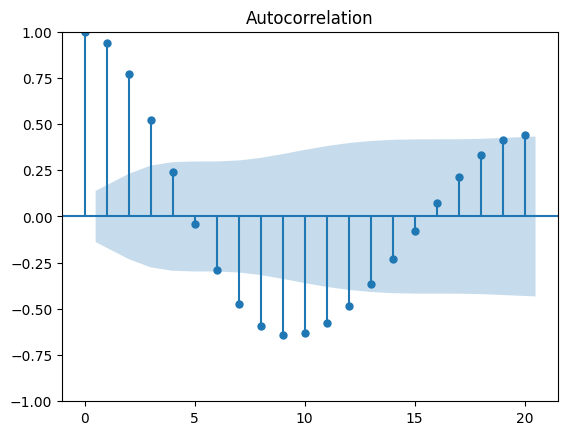

In [228]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
l = 20 #lag
acf = sm.tsa.acf(x,nlags =l)
#Auto correlation Plot

fig = tsaplots.plot_acf(x, lags=l)
plt.show()


In [229]:
import spectrum
[A1,P1,ref] = spectrum.LEVINSON(acf,order=5)
print(A1)
b=[-100]

[-1.80325791  0.74903796  0.2980334  -0.10694852 -0.04684178]


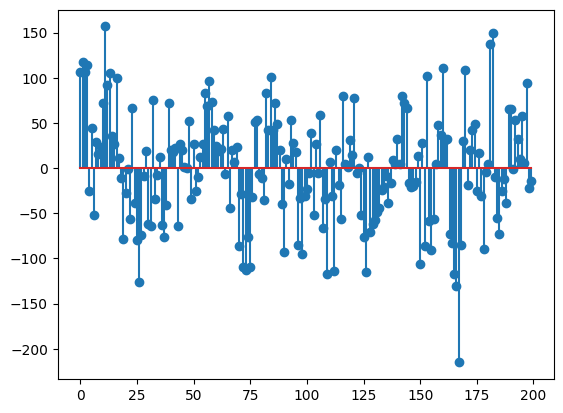

In [230]:
x2 = sg.lfilter(np.array(b),np.array(A1),np.array(w[:200]))
plt.stem(x2)
plt.show()

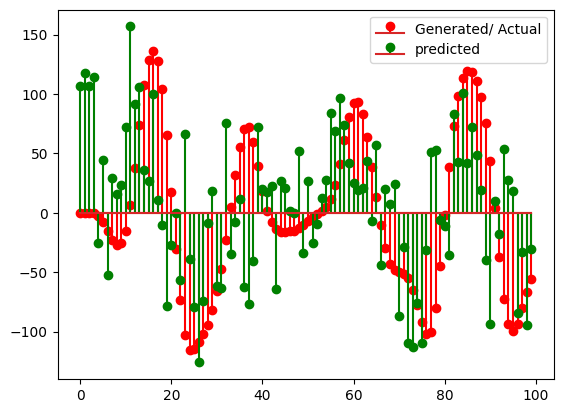

In [231]:
plt.stem(x[:100],'r',label='Generated/ Actual')
plt.stem(x2[:100],'g',label='predicted')
plt.legend()
plt.show()

In [232]:
e=[]
for i in range(200):
    e.append(x[i]-x2[i])

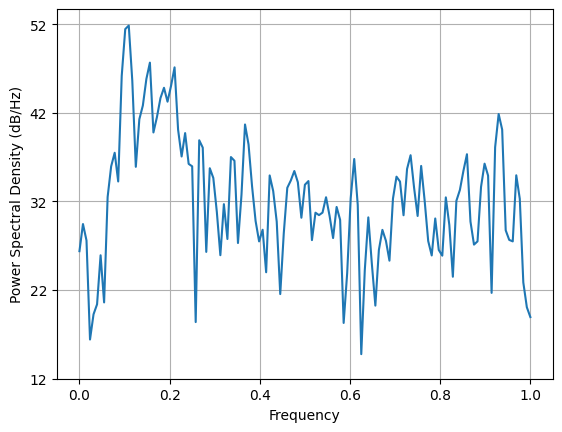

In [234]:

plt.psd(e)
plt.show()

### Order 8

In [238]:
[A2,P2,ref] = spectrum.LEVINSON(acf,order=8)
print(A2)
b=[-100]

[-1.7456785   0.63509962  0.30872409  0.05737498 -0.04079946 -0.12840585
 -0.13168721  0.18949275]


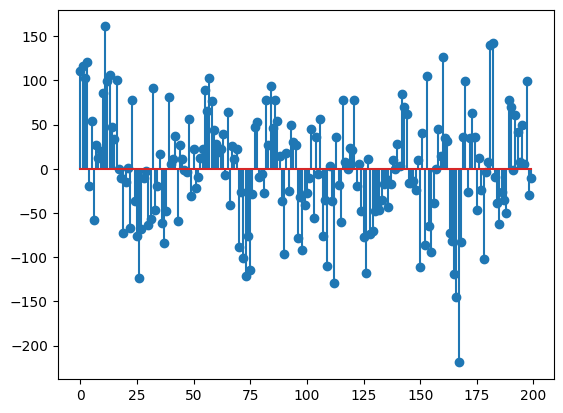

In [239]:
x3 = sg.lfilter(np.array(b),np.array(A2),np.array(w[:200]))
plt.stem(x3)
plt.show()

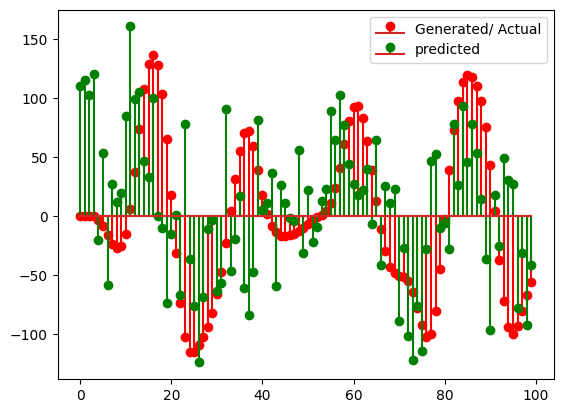

In [241]:
plt.stem(x[:100],'r',label='Generated/ Actual')
plt.stem(x3[:100],'g',label='predicted')
plt.legend()
plt.show()

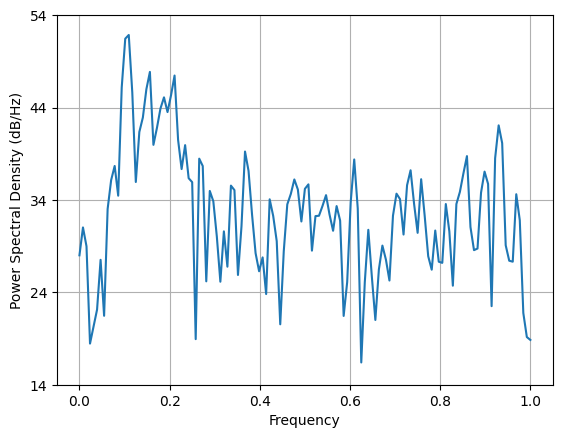

In [242]:
e=[]
for i in range(200):
    e.append(x[i]-x3[i])
plt.psd(e)
plt.show()

# Part B

In [105]:
from scipy import signal as sg

In [255]:
b = [0.5]
a = [1,-3.312,4.417,-2.809,0.72]
x1 = sg.lfilter(np.array(b),np.array(a),np.array(w[:200]))

In [256]:
print(len(x1))

200


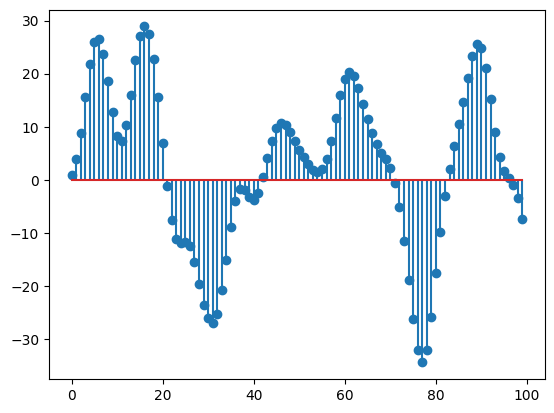

In [257]:
plt.stem(x1[:100])
plt.show()

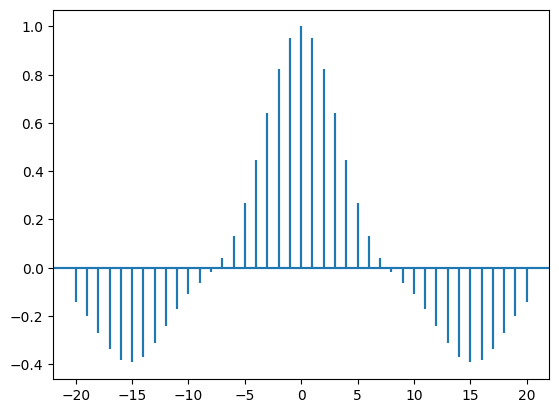

In [258]:
[lags,c1,line,line2] = plt.acorr(x1,maxlags=20)
plt.acorr(x1,maxlags=20)
plt.show()

In [259]:
import spectrum
A2 = librosa.lpc(np.array(x1),order=5)
print(A2)
print(a)

[ 1.         -3.24980533  4.16641121 -2.3871966   0.37909777  0.10967947]
[1, -3.312, 4.417, -2.809, 0.72]


In [260]:
b = [1]
xp2 = sg.lfilter(np.array(b),np.array(A2),np.array(w[:200]))

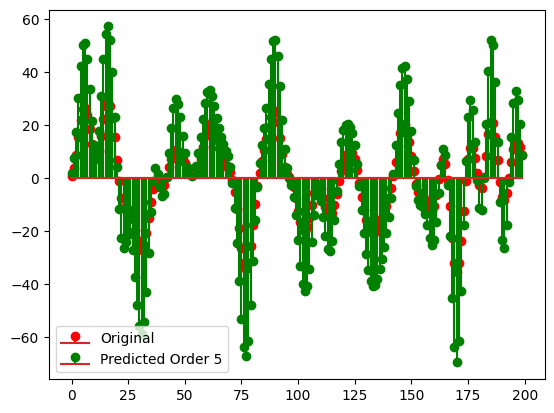

In [261]:
plt.stem(x1,'r',markerfmt='ro',label="Original")
plt.stem(xp2,'g',markerfmt='go',label="Predicted Order 5")
plt.legend()
plt.show()

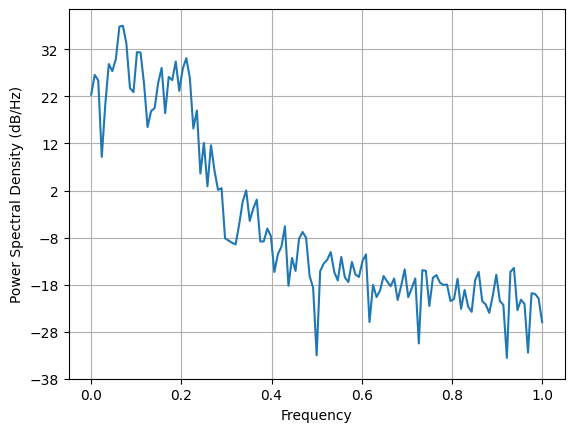

In [262]:
e=[]
for i in range(200):
    e.append(x1[i]-xp2[i])
plt.psd(e)
plt.show()

## ORDER 8

In [264]:
import spectrum
A3 = librosa.lpc(np.array(x1),order=8)
print(A3)
print(a)

[ 1.         -3.25411668  4.16669206 -2.29992503  0.11538713  0.44703762
 -0.20134296  0.03692232  0.00831226]
[1, -3.312, 4.417, -2.809, 0.72]


In [265]:
b = [1]
xp3 = sg.lfilter(np.array(b),np.array(A3),np.array(w[:200]))

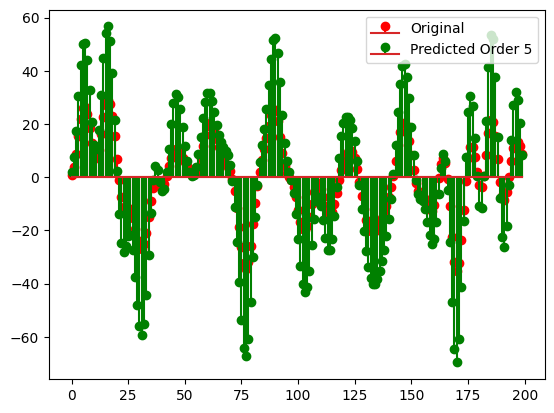

In [266]:
plt.stem(x1,'r',markerfmt='ro',label="Original")
plt.stem(xp3,'g',markerfmt='go',label="Predicted Order 5")
plt.legend()
plt.show()

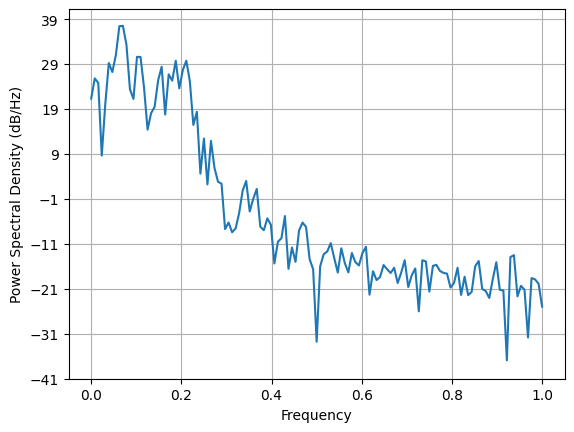

In [267]:
e=[]
for i in range(200):
    e.append(x1[i]-xp3[i])
plt.psd(e)
plt.show()